Since the ultimate goal is to predict if a user will churn or not, this exploratory data analysis will focus on comparing the group of users that churned and the group of users that did not churn.

As addressed in the data wrangling report, the train dataset is extremely biased, only 87330 out of the 970960 have churned (8.9%). The majority group must be downsampled to 100000 to create an accurate classifier.

The insights found will be summarized in the conclusion (last section).

# 1. Load Libraries

In [4]:
import pandas as pd
import numpy as np
import time
from datetime import datetime

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def freqbars(colname, data, name):
    tm_plot = data.groupby(['is_churn', colname]).size().reset_index().pivot(columns='is_churn', index=colname, values=0)
    tm_plot.plot(kind='bar', stacked = False, color = ('navy', 'skyblue'))
    plt.ylabel('Count', fontsize=12)
    plt.xlabel(name, fontsize=12)
    plt.xticks(rotation='vertical')
    plt.title(f"Frequency of {name} Count", fontsize=12)

# 2. Downsampling majority group

In [4]:
#Read train data
train = pd.read_csv('./EDA_Data/train_v2.csv')

#Split train data into churn and no churn dataframes
train_churn = train[train.is_churn == 1]
train_nochurn = train[train.is_churn == 0]

#Sample nochurn group
nochurn_sample = train_nochurn.msno.sample(n=100000, random_state=3).tolist()
train_nochurn = train[train.msno.isin(nochurn_sample)]

#Combine the two dataframes
train = pd.concat([train_churn, train_nochurn])
train.reset_index(drop=True, inplace=True)

In [4]:
train.describe()

,is_churn
count,187330.000000
mean,0.466183
std,0.498856
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


Now our train data is no longer biased with 46.6% being churned.

# 3. Insights

## Questions Regarding User Demographics

In [44]:
members = pd.read_csv('./EDA_Data/members_modified.csv')

In [45]:
# Merge train data and member data
train_member = pd.merge(left = train,right = members,how = 'left',on=['msno'])

* **Where are most of the members from?**

In [9]:
train_member.city.value_counts()[:6]

1.0     75444
13.0    21523
5.0     16263
4.0     10753
15.0     9848
22.0     9491
6.0      5990
Name: city, dtype: int64

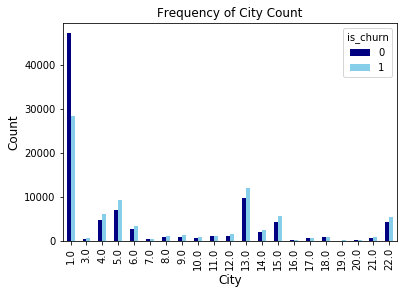

In [10]:
# City count
#sns.countplot(x="city", data=train_member, color = 'skyblue')
freqbars(colname = 'city', data = train_member, name = 'City')

The user distribution across the different cities are the similar between those that churned vs those that did not churn. More than half of the users are concentrated in city 1. The rest of the users are more dispersed across the other cities. Those in cities other than 1 were more likely to churn. Unfortunately, we do not information regarding what city each number represents. 

* **How old are most of the members?**

Text(0.5, 1.0, 'Frequency of Age Count')

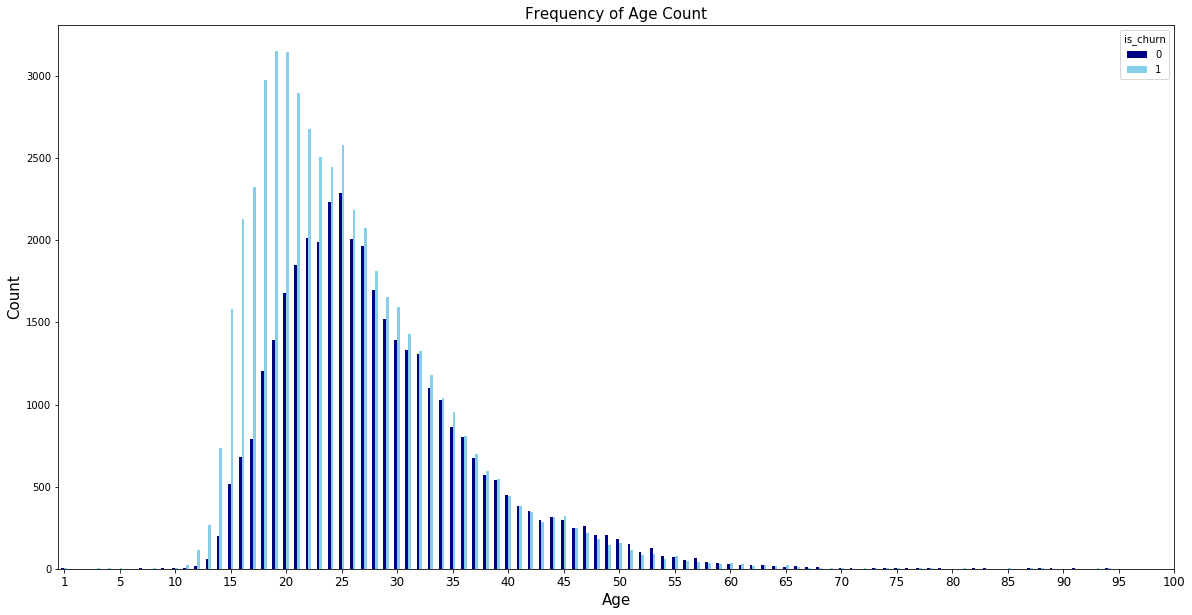

In [12]:
# Age count
tm_plot = train_member.groupby(['is_churn', 'bd']).size().reset_index().pivot(columns='is_churn', index='bd', values=0)
tm_plot.plot(kind='bar', stacked = False, color = ('navy', 'skyblue'), figsize=(20,10))
plt.ylabel('Count', fontsize=15)
plt.xlabel('Age', fontsize=15)
labellist = [1]
labellist.extend(list(range(5,101,5)))
plt.xticks(ticks = range(0, 101, 5), labels = labellist, rotation = 'horizontal', fontsize = 12)
plt.title("Frequency of Age Count", fontsize=15)

The users' age are pretty normally distributed, with a slight right skew. This music streaming service is popular among those in their twenties, which makes up half of the users. 

It's interesting to note that the peak for the churned group is in the early twenties while the peak for those who did not churn has a peak in the late twenties.

* **What gender uses KKBox more?**

In [20]:
train_member.gender.value_counts()

male      46431
female    42200
Name: gender, dtype: int64

In [1]:
46341/(46431+42200)

0.5228531777820401

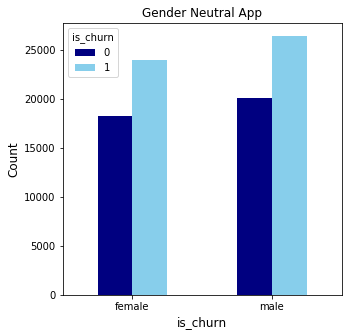

In [21]:
tm_plot = train_member.groupby(['is_churn', 'gender']).size().reset_index().pivot(columns='is_churn', index='gender', values=0)
tm_plot.plot(kind='bar', stacked = False, color = ('navy', 'skyblue'), figsize = (5,5))
plt.ylabel('Count', fontsize=12)
plt.xlabel('is_churn', fontsize=12)
plt.xticks(rotation='horizontal', fontsize = 10)
plt.title("Gender Neutral App", fontsize=12)
plt.show()

The gender ratio among the users are split pretty evenly in both the group that churned and didn't churn. There are slightly more male users. 

* **How did most KKBox users register?**

In [22]:
train_member.registered_via.value_counts()

7.0     70820
9.0     53111
3.0     28401
4.0     16781
13.0      691
Name: registered_via, dtype: int64

Text(0.5, 1.0, 'Frequency of Registration Method Count')

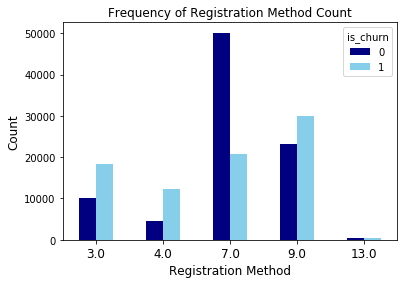

In [23]:
freqbars(colname = 'registered_via', data = train_member, name = 'Registration Method')
plt.xticks(rotation = 'horizontal', fontsize = 12)
plt.ylabel('Count', fontsize=12)
plt.title("Frequency of Registration Method Count", fontsize=12)

There seems to be clear distinction in distribution among the 2 groups. Most of the people who did not churn registered via method 7 while most of the people who churned registered via method 9. Those who registered via method 3 and 4 were more likely to churn.

## Questions regarding user transactions

In [4]:
transactions = pd.read_csv('./EDA_Data/transactions_modified.csv')

In [41]:
train_transac = pd.merge(left = train, right = transactions, how ='left', on = ['msno'])

In [14]:
train_transac.head()

,msno,is_churn,Unnamed: 0,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,283083.0,36.0,30.0,180.0,180.0,0.0,2017-03-11,2017-04-11,0.0
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,342511.0,17.0,60.0,0.0,0.0,0.0,2017-03-11,2017-03-14,0.0
3,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,407364.0,15.0,90.0,300.0,300.0,0.0,2017-03-14,2017-06-15,0.0
4,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,229350.0,41.0,30.0,149.0,149.0,1.0,2015-09-08,2017-06-08,0.0


* **Do those that churn make less transactions than those that kept their subscription?**

In [106]:
user_trans = train_transac.groupby(['msno','is_churn']).count()
user_trans = user_trans.iloc[:, :1]
user_trans.columns = ['transactions']
user_trans = user_trans.reset_index()

In [107]:
#Group transactions into chunks
def groupstrans(row):
    if row['transactions'] == 0:
        val = '0'
    elif row['transactions'] == 1:
        val = '1'
    elif row['transactions'] < 6:
        val = '2-5'
    elif row['transactions'] < 11:
        val = '6-10'
    elif row['transactions'] < 26:
        val = '11-25'
    elif row['transactions'] < 51:
        val = '26-50'
    elif row['transactions'] < 76:
        val = '51-75'
    elif row['transactions'] < 101:
        val = '76-100'
    else:
        val = '100 + '
    return val

user_trans['group'] = user_trans.apply(groupstrans, axis = 1)
user_trans.set_index('group', inplace = True)

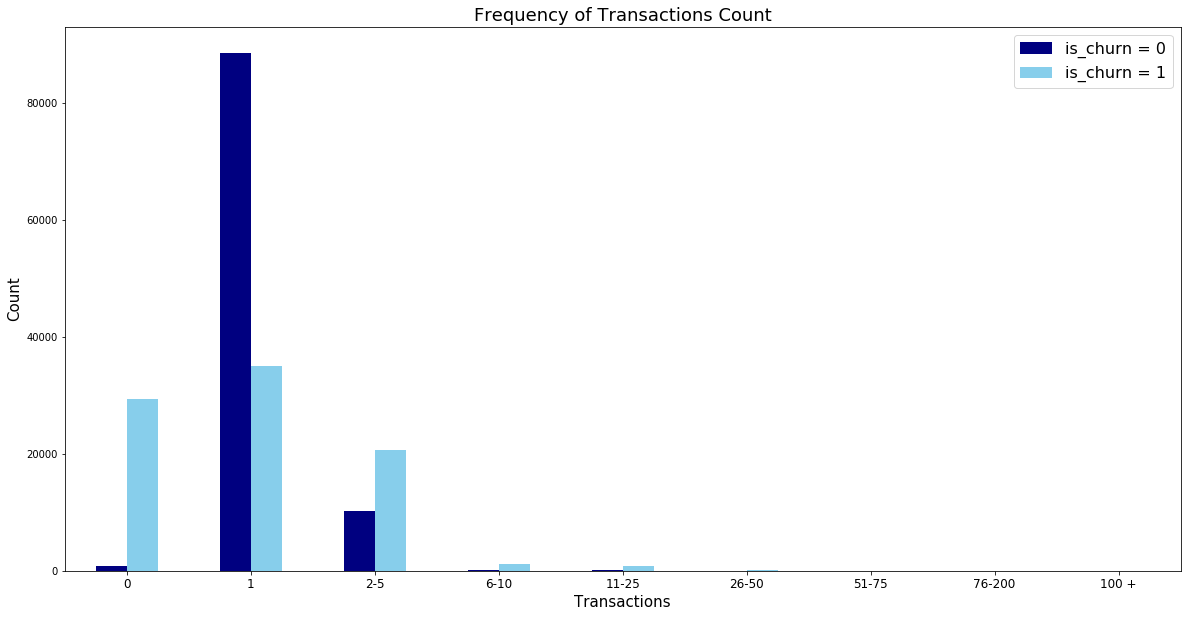

In [111]:
ut_plot = user_trans.groupby(['is_churn', 'group']).size().reset_index().pivot(columns='is_churn', index='group', values=0)
order = ['0', '1', '2-5', '6-10', '11-25', '26-50', '51-75', '76-200', '100 +']
ut_plot.reindex(order).plot(kind = 'bar', color = ('navy', 'skyblue'), figsize=(20,10))
plt.ylabel('Count', fontsize=15)
plt.xlabel('Transactions', fontsize=15)
plt.xticks(rotation = 'horizontal', fontsize = 12)
plt.title("Frequency of Transactions Count", fontsize=18)
plt.legend(loc='upper right', fontsize = 16, labels = ['is_churn = 0', 'is_churn = 1'])

Most of the users (churned and not churned) have only made 1 transaction. Those who have made no transactions or more than 1 transaction are more likely to churn. 

* **What payment method did most users use?**

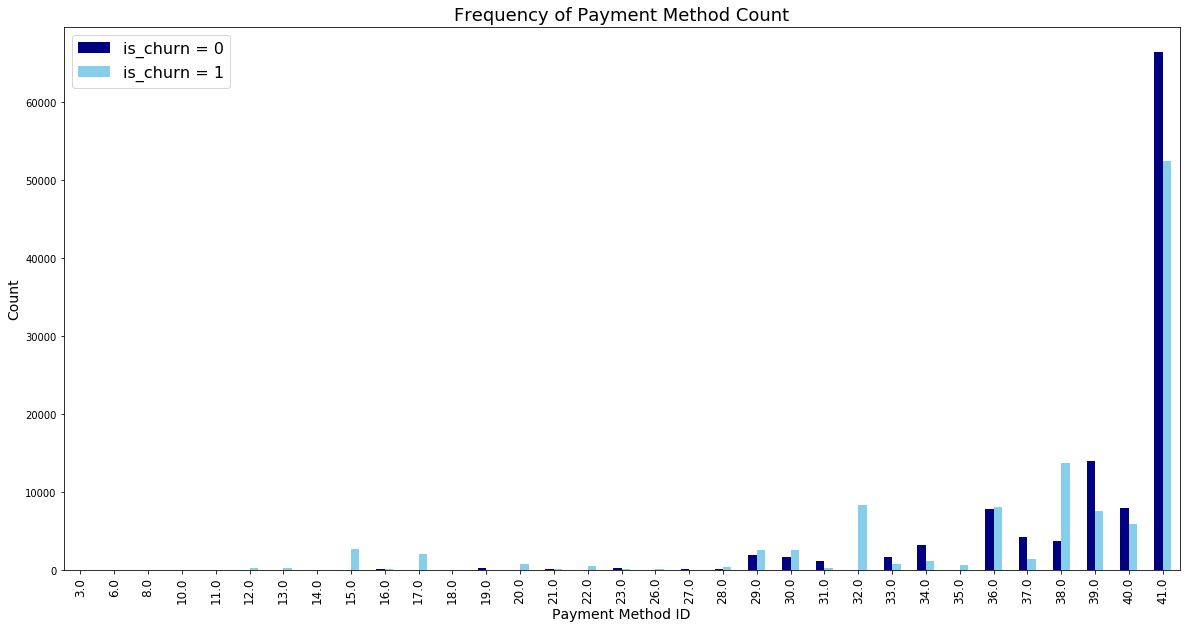

In [24]:
ud_plot = train_transac.groupby(['is_churn', 'payment_method_id']).size().reset_index().pivot(columns='is_churn', index='payment_method_id', values=0)
ud_plot.plot(kind='bar', stacked = False, color = ('navy', 'skyblue'), figsize=(20,10))
plt.ylabel('Count', fontsize=14)
plt.xlabel('Payment Method ID', fontsize=14)
plt.xticks(rotation = 'vertical', fontsize = 12)
plt.title("Frequency of Payment Method Count", fontsize=18)
plt.legend(loc='upper left', fontsize = 16, labels = ['is_churn = 0', 'is_churn = 1'])

Most users who made transactions had used method 41. Those that used method 38, 32, 17, and 15 were more likely to churn. 

* **What type of payment plan do most users opt for?**

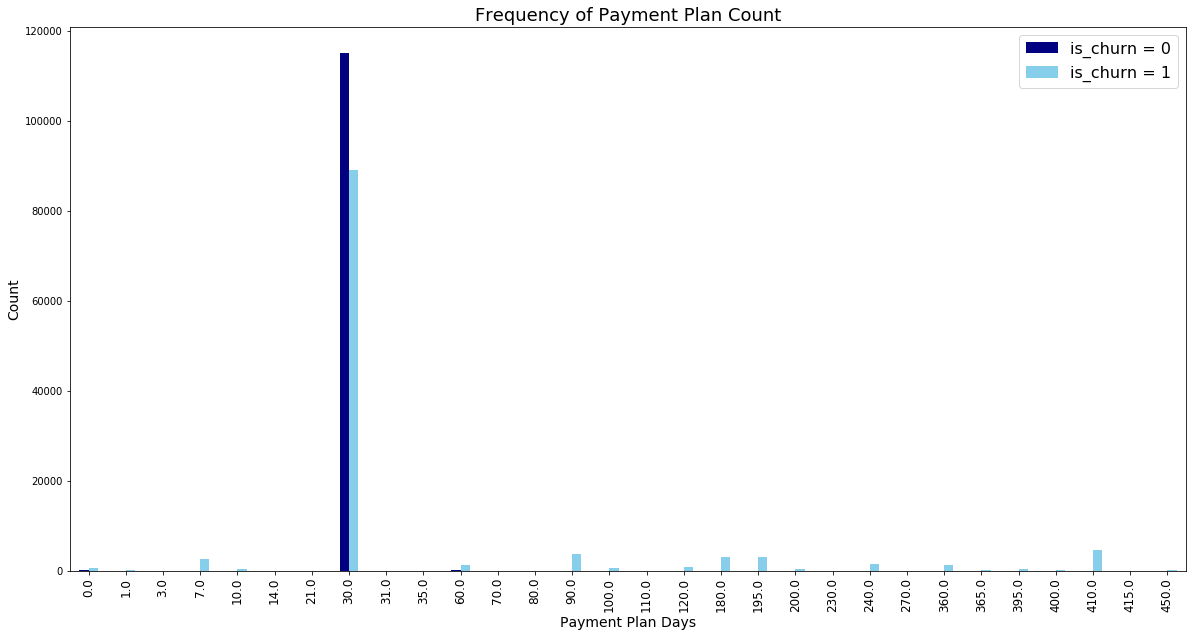

In [30]:
ud_plot = train_transac.groupby(['is_churn', 'payment_plan_days']).size().reset_index().pivot(columns='is_churn', index='payment_plan_days', values=0)
ud_plot.plot(kind='bar', stacked = False, color = ('navy', 'skyblue'), figsize=(20,10))
plt.ylabel('Count', fontsize=14)
plt.xlabel('Payment Plan Days', fontsize=14)
plt.xticks(rotation = 'vertical', fontsize = 12)
plt.title("Frequency of Payment Plan Count", fontsize=18)
plt.legend(loc='upper right', fontsize = 16, labels = ['is_churn = 0', 'is_churn = 1'])

Most people pay monthly for their subscription; these people are also more likely to not churn. Those that had churned had been on payment plans that were less frequent (60 days, 90 days, even 410 days).

* **Did those that kept their subscription receive more discounts than those that churned?**

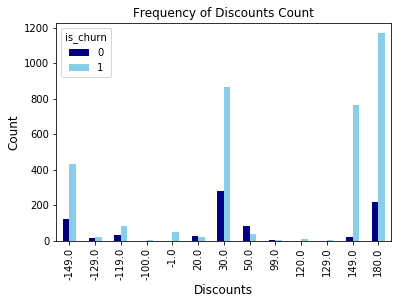

In [6]:
train_transac['difference'] = train_transac['plan_list_price'] - train_transac['actual_amount_paid']
freqbars(colname = 'difference', data = train_transac[train_transac.difference != 0], name = 'Discounts')

It seems that those that did not churn did not receive any discounts. However, those that churned either received discounts or overpaid (positive values) for their plan. This poses the question of whether or not mischarging had caused the user to churn.

* **Which users use auto-renew more?**

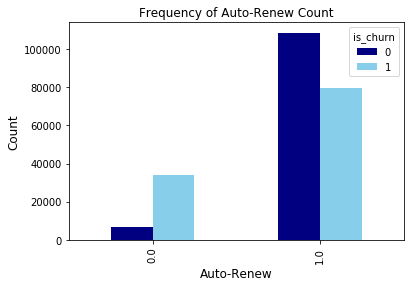

In [22]:
freqbars(colname = 'is_auto_renew', data = train_transac, name = 'Auto-Renew')

Most users opt to use the auto-renew feature. Those that don't use it tend to churn more.

* **Do those that cancel their membership tend to churn?**

In [26]:
train_transac[train_transac.is_cancel == 1].is_churn.value_counts()

1    19590
0     1547
Name: is_churn, dtype: int64

Only 7.3% of those that cancelled their accounts re-opened their subscription.

* **Are accounts that have been opened longer (based on most recent transaction date) more likely to churn?**

In [100]:
# Keep only the most recent transaction date
most_recent = train_transac.sort_values(by='transaction_date', ascending=False)
most_recent.drop_duplicates(subset = ['msno'], keep=False, inplace = True)
most_recent = most_recent[['msno', 'is_churn','transaction_date']]

#Select columns needed from members data
acc_member = train_member[['msno', 'registration_init_time']]

#Merge the 2 datasets
account_len = pd.merge(left = most_recent, right = acc_member, how = 'inner', on = ['msno'])
account_len = account_len[(account_len.transaction_date.notnull() & account_len.registration_init_time.notnull())]

#Convert dates into datetime objects
account_len['registration_init_time'] = account_len.registration_init_time.apply(lambda x: datetime.strptime(str(x), "%Y-%m-%d").date() if pd.notnull(x) else None)
account_len['transaction_date'] = account_len.transaction_date.apply(lambda x: datetime.strptime(str(x), "%Y-%m-%d").date() if pd.notnull(x) else None)

#Calculate length of accounts
account_len['length'] = account_len['transaction_date'] - account_len['registration_init_time']

In [113]:
from datetime import timedelta
def groupsaccount(row):
    if row['length'] == 0:
        val = '0'
    elif row['length'] < timedelta(days=365):
        val = '< 1 year'
    elif row['length'] < timedelta(days=365*2):
        val = '1-2 years'
    elif row['length'] < timedelta(days=365*3):
        val = '2-3 years'
    elif row['length'] < timedelta(days=365*4):
        val = '3-4 years'
    elif row['length'] < timedelta(days=365*5):
        val = '4-5 years'
    elif row['length'] < timedelta(days=365*6):
        val = '5-6 years'
    else:
        val = '6+ years'
    return val

account_len['group'] = account_len.apply(groupsaccount, axis = 1)

Text(0.5, 1.0, 'Frequency of Account Length Count')

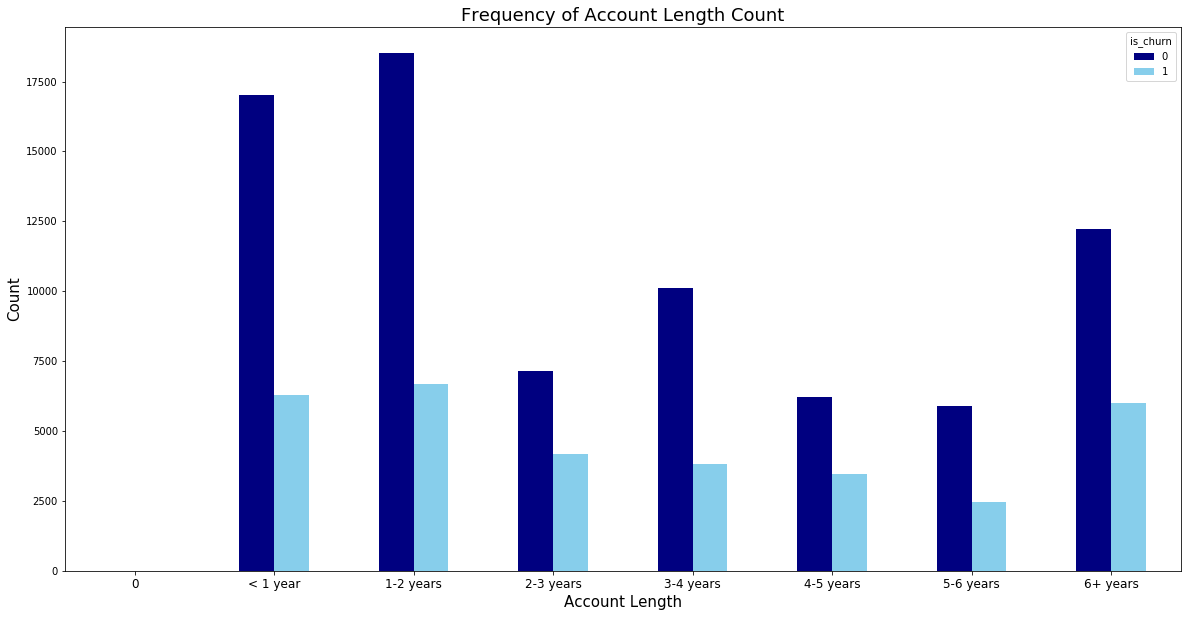

In [114]:
al_plot = account_len.groupby(['is_churn', 'group']).size().reset_index().pivot(columns='is_churn', index='group', values=0)
order = ['0', '< 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '5-6 years', '6+ years']
al_plot.reindex(order).plot(kind = 'bar', color = ('navy', 'skyblue'), figsize=(20,10))
plt.ylabel('Count', fontsize=15)
plt.xlabel('Account Length', fontsize=15)
plt.xticks(rotation = 'horizontal', fontsize = 12)
plt.title("Frequency of Account Length Count", fontsize=18)

30,317 people have not made any transactions. However, most of those that had made transactions have had their accounts open for 1-2 years. The distribution between the different account lengths seem to be similar in both groups. 

## Questions regarding user interactions with app

In [5]:
user_logs = pd.read_csv('./EDA_Data/user_logs_modified.csv')

In [6]:
train_log = pd.merge(left = train, right = user_logs, how = 'left', on =['msno'])

In [68]:
len(set(list(train_log[train_log.date.isnull()].msno)))

41800

There are 41,800 users that did not use the app at all for the month of March.

* **Do users who churn use the app less than those who kept their subscription?**

In [130]:
user_day = train_log.groupby(['msno','is_churn']).count()
user_day = user_day.iloc[:, :1]
user_day.columns = ['day_count']
user_day = user_day.reset_index()

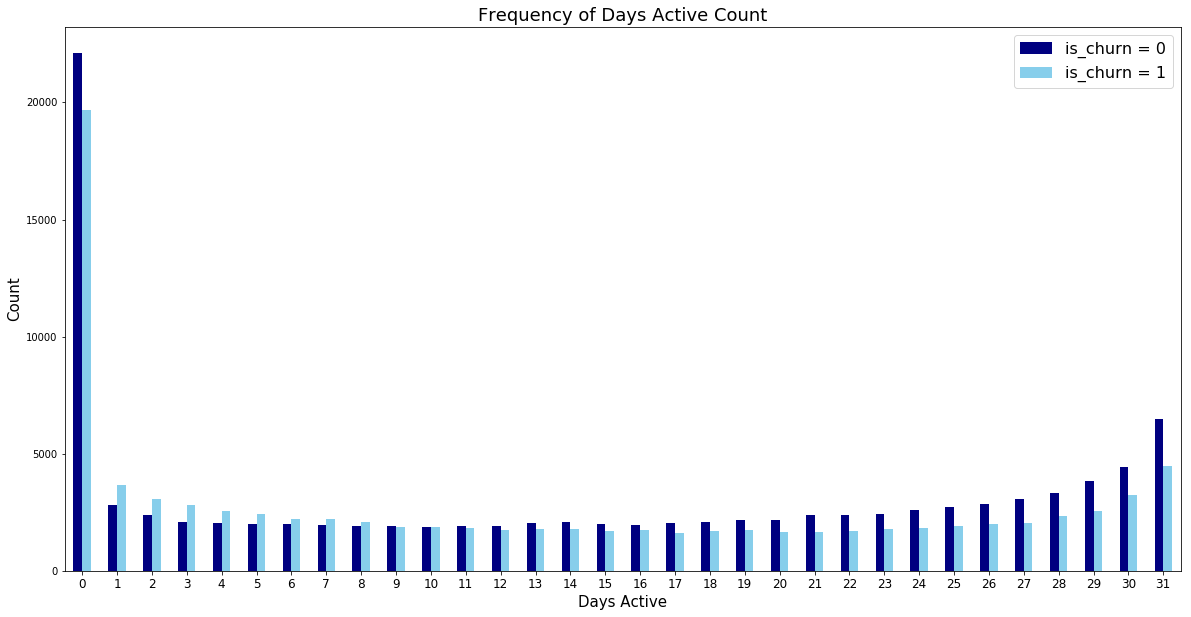

In [131]:
ud_plot = user_day.groupby(['is_churn', 'day_count']).size().reset_index().pivot(columns='is_churn', index='day_count', values=0)
ud_plot.plot(kind='bar', stacked = False, color = ('navy', 'skyblue'), figsize=(20,10))
plt.ylabel('Count', fontsize=15)
plt.xlabel('Days Active', fontsize=15)
plt.xticks(rotation = 'horizontal', fontsize = 12)
plt.title("Frequency of Days Active Count", fontsize=18)
plt.legend(loc='upper right', fontsize = 16, labels = ['is_churn = 0', 'is_churn = 1'])

Interestingly, there is not much difference in the distribution of days active between the two groups. Most did not use the app at all throughout the month while 5.8% of the users used the app everyday.

Since the number of active days are not much different. Possibly to total number of seconds would differ.

In [29]:
user_secs = train_log.groupby(['msno','is_churn']).sum()['total_secs']
user_secs = user_secs.to_frame()
user_secs.columns = ['total_secs']
user_secs = user_secs.reset_index()

Text(0.5, 1.0, 'Frequency of Listening Behavior')

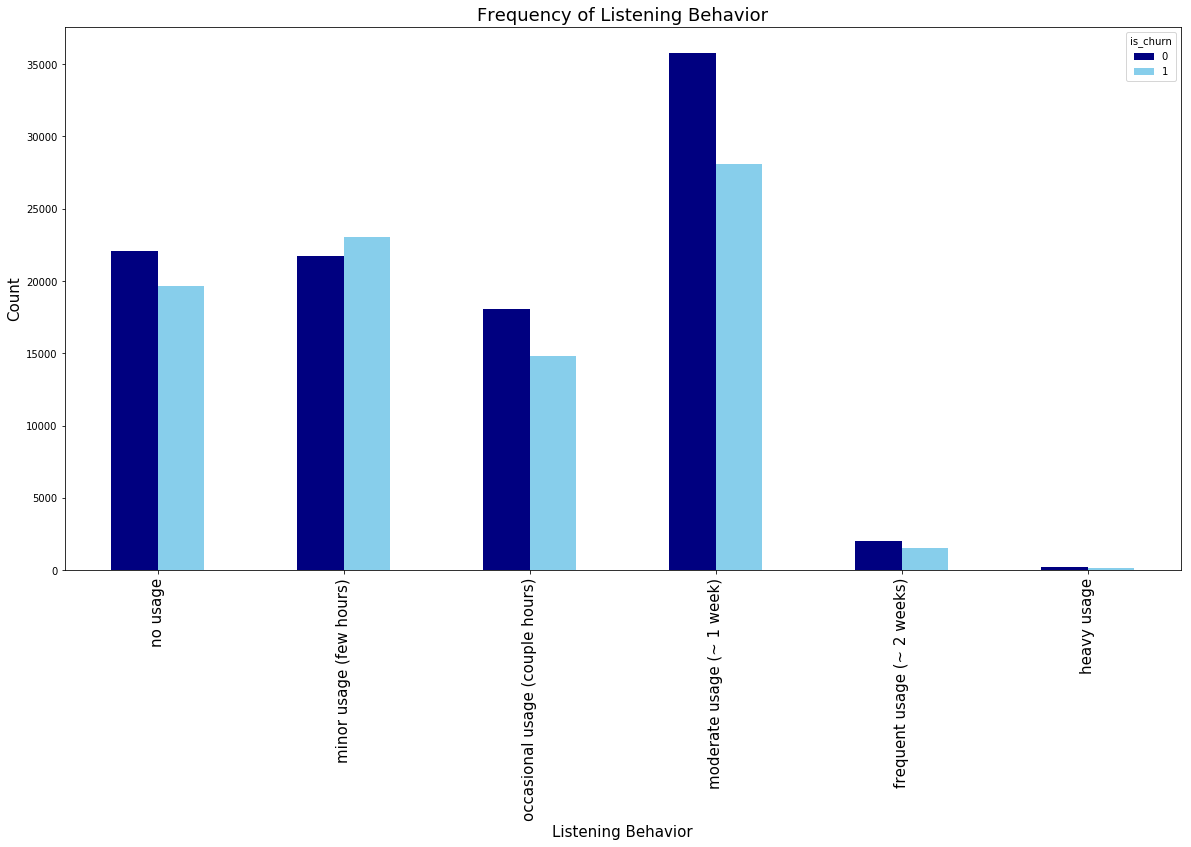

In [137]:
us_plot = user_secs.groupby(['is_churn', 'group']).size().reset_index().pivot(columns='is_churn', index='group', values=0)
order = ['no usage', 'minor usage (few hours)', 'occasional usage (couple hours)', 'moderate usage (~ 1 week)', 'frequent usage (~ 2 weeks)', 'heavy usage']
us_plot.reindex(order).plot(kind = 'bar', color = ('navy', 'skyblue'), figsize=(20,10))
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.xlabel('Listening Behavior', fontsize=15)
plt.title("Frequency of Listening Behavior", fontsize=18)

Seems like both groups use the app the about the same amount even in terms of seconds listened. Most people only moderately use the app to listen to music. Those who use the app for only a few hours a month were more likely to churn.

The number of songs listened and unique songs listened may also explain the relationship between churn and listening behavior. 

In [20]:
train_log['num_songs'] = train_log.num_25 + train_log.num_50 + train_log.num_75 + train_log.num_985 + train_log.num_100
user_songs = train_log.groupby(['msno','is_churn']).sum()['num_songs']
user_songs = user_songs.to_frame()
user_songs.columns = ['total_songs']
user_songs = user_songs.reset_index()

Text(0.5, 1.0, 'Relationship Between Total Songs Listened and Churn')

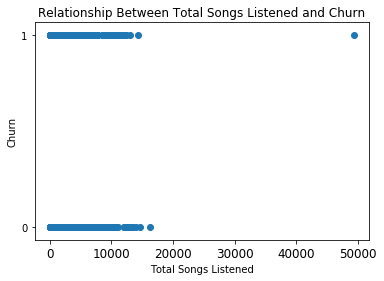

In [32]:
plt.scatter(x = user_songs.total_songs, y = user_songs.is_churn)
plt.ylabel('Churn', fontsize=10)
plt.yticks(ticks = [0,1])
plt.xlabel('Total Songs Listened', fontsize=10)
plt.xticks(rotation = 'horizontal', fontsize = 12)
plt.title("Relationship Between Total Songs Listened and Churn", fontsize=12)

The distribution of songs listened is very slightly more spread out for the group that did not churn. There seems to be an outlier for the churn group.

In [34]:
user_uniq = train_log.groupby(['msno','is_churn']).sum()['num_unq']
user_uniq = user_uniq.to_frame()
user_uniq.columns = ['total_songs']
user_uniq = user_uniq.reset_index()

Text(0.5, 1.0, 'Relationship Between Total Unique Songs and Churn')

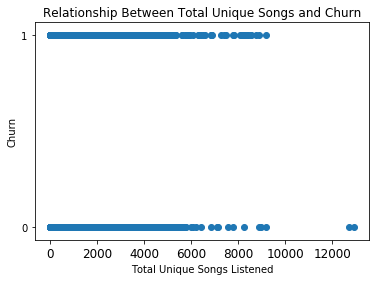

In [36]:
plt.scatter(x = user_uniq.total_songs, y = user_uniq.is_churn)
plt.ylabel('Churn', fontsize=10)
plt.yticks(ticks = [0,1])
plt.xlabel('Total Unique Songs Listened', fontsize=10)
plt.xticks(rotation = 'horizontal', fontsize = 12)
plt.title("Relationship Between Total Unique Songs and Churn", fontsize=12)

Like above, the distribution of total unique songs is more spread out for the group that did not churn. 

* **Are accounts that have been opened longer (based on most recent daily log date) more likely to churn?**

In [62]:
# Keep only the most recent transaction date
most_recent = train_log[train_log.date.notnull()]
most_recent = train_log.sort_values(by='date', ascending=False)
most_recent.drop_duplicates(subset = ['msno'], keep=False, inplace = True)
most_recent = most_recent[['msno', 'is_churn','date']]

#Select columns needed from members data
acc_member = train_member[['msno', 'registration_init_time']]

#Merge the 2 datasets
account_len = pd.merge(left = most_recent, right = acc_member, how = 'inner', on = ['msno'])
account_len = account_len[(account_len.date.notnull() & account_len.registration_init_time.notnull())]

#Convert dates into datetime objects
account_len['registration_init_time'] = account_len.registration_init_time.apply(lambda x: datetime.strptime(str(x), "%Y-%m-%d").date() if pd.notnull(x) else None)
account_len['date'] = account_len.date.apply(lambda x: datetime.strptime(str(x), "%Y-%m-%d").date() if pd.notnull(x) else None)

#Calculate length of accounts
account_len['length'] = account_len['date'] - account_len['registration_init_time']

In [70]:
from datetime import timedelta
def groupsaccount(row):
    if row['length'] == 0:
        val = '0'
    elif row['length'] < timedelta(days=365):
        val = '< 1 year'
    elif row['length'] < timedelta(days=365*2):
        val = '1-2 years'
    elif row['length'] < timedelta(days=365*3):
        val = '2-3 years'
    elif row['length'] < timedelta(days=365*4):
        val = '3-4 years'
    elif row['length'] < timedelta(days=365*5):
        val = '4-5 years'
    elif row['length'] < timedelta(days=365*6):
        val = '5-6 years'
    else:
        val = '6+ years'
    return val

account_len['group'] = account_len.apply(groupsaccount, axis = 1)

Text(0.5, 1.0, 'Frequency of Account Length Count')

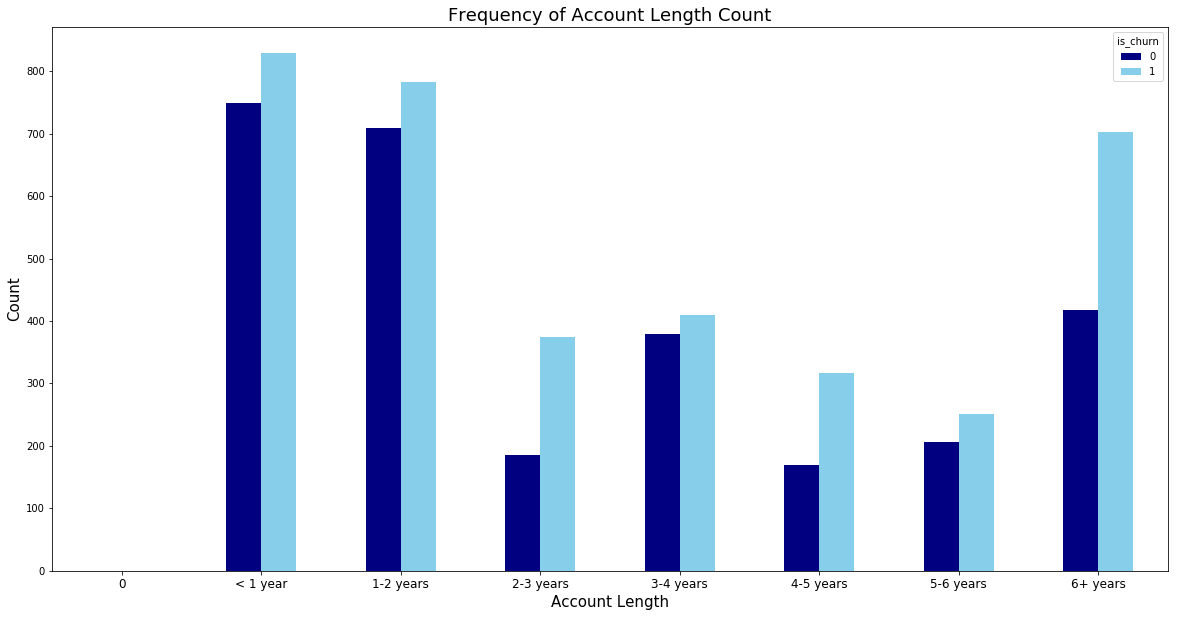

In [72]:
al_plot = account_len.groupby(['is_churn', 'group']).size().reset_index().pivot(columns='is_churn', index='group', values=0)
order = ['0', '< 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '5-6 years', '6+ years']
al_plot.reindex(order).plot(kind = 'bar', color = ('navy', 'skyblue'), figsize=(20,10))
plt.ylabel('Count', fontsize=15)
plt.xlabel('Account Length', fontsize=15)
plt.xticks(rotation = 'horizontal', fontsize = 12)
plt.title("Frequency of Account Length Count", fontsize=18)

In [80]:
account_len.is_churn.describe()

count    6480.000000
mean        0.565586
std         0.495718
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: is_churn, dtype: float64

Only 6,480 people have information for the time they had registered and the activity logged in March. 56.5% of these people have churned. Most accounts have been opened for less than a year. However, those accounts that have been opened for more than 6 years were more likely to churn. There seems to be a retention problem for long-time users.

# 4. Conclusion

The purpose of this exploratory data analysis was to highlight differences between the user that churned and the users that kept their subscription. For a lot of features, the distribution were very similar in both groups. Below is a list of insights that were seen in both groups:
* Most users are from city 1
* Male to Female ratio was 52:48
* Most users pay via method 41
* Most users registered via method 7
* Most users opt for monthly payment plans
* A lot of users did not use the app throughout the month of March
* Most users only moderately use the app (168 hours of music for entire month)
* The number of songs listened to was similar between the 2 groups

There were also a few key differences that will be useful in creating a model that would predict the churn rate. Below are key insights regarding the churn group:
* In cities other than city 1, the proportion of those who churned is higher.
* The peak of the age distribution for the churned group is in the early twenties while the peak for those who did not churn has a peak in the late twenties.
* Registration methods other than 7 had a higher number of users who have churned.
* Those who have churned are more likely to have made more than 1 transaction
* Those who have churned are also more likely to have chosen a payment plan that was less frequent than monthly.
* Most people did not receive any discounts; however, those who churned are more likely to have overpaid for their subscription.
* Those that who had accounts that did not auto-renew were more likely to churn
* Those who churned had accounts that were active longer.